In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns 
import re
 
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.inspection import permutation_importance

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, RationalQuadratic
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter, ConstantKernel
from sklearn.gaussian_process.kernels import GenericKernelMixin

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  

from sklearn.pipeline import make_pipeline

from sklearn.base import clone

In [3]:
data = pd.read_csv('Combined_all_3rd.csv', encoding='cp1252') 

In [4]:
data.columns.values

array(['Name', 'Coef_a', 'Coef_b', 'Coef_c', 'Coef_d', 'A_site', 'B_site',
       'X_site', 'Spacegroup', 'Ehull', 'BulkModulus', 'Energy', 'ZPE',
       's_A', 's_B', 's_X', 'density', 'mean_A2B', 'mean_A2X', 'mean_B2X',
       'mean_X2X', 'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'E_coh',
       'TF', 'OF', 'A_Z', 'B_Z', 'X_Z', 'A_M', 'B_M', 'X_M', 'A_G', 'B_G',
       'X_G', 'A_IEI', 'B_IEI', 'X_IEI', 'A_IEII', 'B_IEII', 'X_IEII',
       'A_EA', 'B_EA', 'X_EA', 'A_ChiP', 'B_ChiP', 'X_ChiP', 'A_ChiA',
       'X_ChiA', 'A_Rvdw', 'B_Rvdw', 'X_Rvdw', 'A_Rc', 'B_Rc', 'X_Rc',
       'A_Ra', 'B_Ra', 'X_Ra', 'A_MP', 'B_MP', 'X_MP', 'A_BP', 'B_BP',
       'X_BP', 'A_Rho', 'B_Rho', 'A_MV', 'B_MV', 'X_MV', 'A_Hf', 'B_Hf',
       'X_Hf', 'A_Hv', 'B_Hv', 'X_Hv', 'A_Kappa', 'B_Kappa', 'X_Kappa',
       'A_CvM', 'B_CvM', 'X_CvM', 'A_B', 'B_B', 'X_B', 'A_MendeleevNo',
       'B_MendeleevNo', 'X_MendeleevNo'], dtype=object)

In [5]:
data.drop(['Name', 'A_site', 'B_site', 'X_site', 'Spacegroup', 'Ehull','BulkModulus', 'Energy','s_A','s_B','s_X','Coef_a','Coef_b', 'Coef_c', 'Coef_d'], axis=1, inplace = True)

In [6]:
data.fillna(0, inplace= True)

In [7]:
d=data.copy()
d.columns.values

array(['ZPE', 'density', 'mean_A2B', 'mean_A2X', 'mean_B2X', 'mean_X2X',
       'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'E_coh', 'TF', 'OF',
       'A_Z', 'B_Z', 'X_Z', 'A_M', 'B_M', 'X_M', 'A_G', 'B_G', 'X_G',
       'A_IEI', 'B_IEI', 'X_IEI', 'A_IEII', 'B_IEII', 'X_IEII', 'A_EA',
       'B_EA', 'X_EA', 'A_ChiP', 'B_ChiP', 'X_ChiP', 'A_ChiA', 'X_ChiA',
       'A_Rvdw', 'B_Rvdw', 'X_Rvdw', 'A_Rc', 'B_Rc', 'X_Rc', 'A_Ra',
       'B_Ra', 'X_Ra', 'A_MP', 'B_MP', 'X_MP', 'A_BP', 'B_BP', 'X_BP',
       'A_Rho', 'B_Rho', 'A_MV', 'B_MV', 'X_MV', 'A_Hf', 'B_Hf', 'X_Hf',
       'A_Hv', 'B_Hv', 'X_Hv', 'A_Kappa', 'B_Kappa', 'X_Kappa', 'A_CvM',
       'B_CvM', 'X_CvM', 'A_B', 'B_B', 'X_B', 'A_MendeleevNo',
       'B_MendeleevNo', 'X_MendeleevNo'], dtype=object)

In [8]:
columns = list(d.columns.values)

In [9]:
data_std=d.copy()
scaler=StandardScaler()
scaler.fit(np.array(data['ZPE']).reshape(-1, 1))
data_zpe_std= scaler.transform(np.array(data['ZPE']).reshape(-1, 1))
data_std[columns]= StandardScaler().fit_transform(d[columns])
Y = data_std['ZPE'] 
X = data_std.drop(['ZPE'], axis=1)

In [10]:
corrmat = X.corr()
top_corr_features = corrmat.index
correlated_features = set()

In [11]:
for i in range(len(X.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.9:
            colname = corrmat.columns[i]
            correlated_features.add(colname)
len(correlated_features)
print(correlated_features)

{'X_ChiA', 'X_IEII', 'X_Hf', 'A_M', 'A_BP', 'X_CvM', 'X_B', 'B_Hv', 'X_MP', 'A_Ra', 'B_M', 'A_MV', 'A_MendeleevNo', 'X_Rc', 'X_MendeleevNo', 'X_Ra', 'X_Hv', 'X_M', 'A_Hv', 'X_BP', 'B_BP', 'A_Hf', 'A_Rc'}


In [12]:
data_std.drop(labels=correlated_features, axis=1, inplace=True)
data_std.shape

(80, 51)

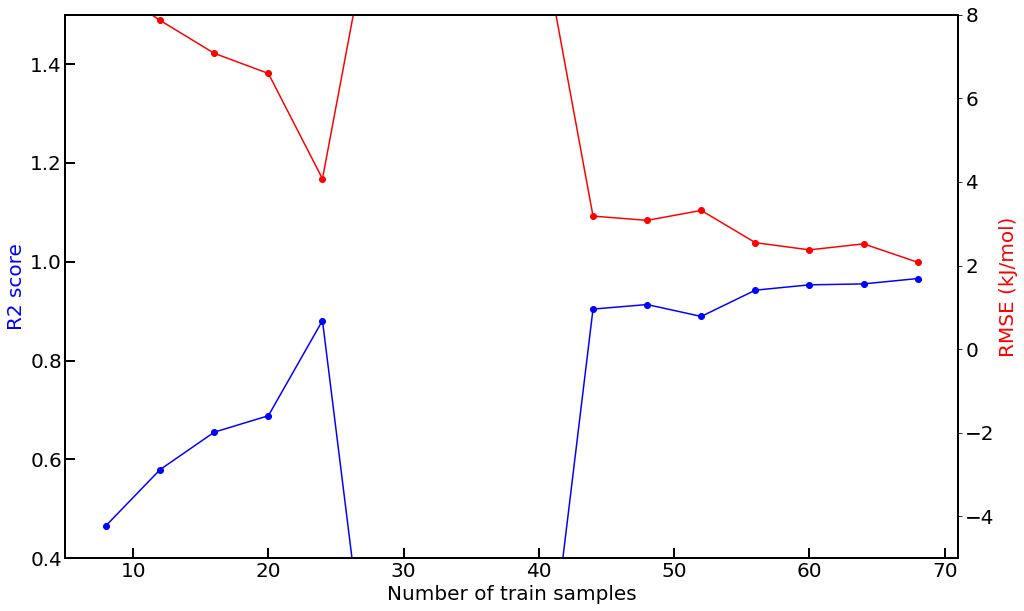

In [13]:
train_samples = []
count = 0
r2scores = []
rmse = []
for i in range(10,90,5):
# split into train and test
    df_train, df_test = train_test_split(data_std, 
                                     train_size = i/100, 
                                     random_state = 50)
    #df_train.reset_index(inplace = True)
    #df_test.reset_index(inplace = True)
    #df_train=df_train.drop('index',axis=1)
    #df_test=df_test.drop('index',axis=1)
    # divide into X_train, y_train, X_test, y_test
    train_samples.append(df_train.shape[0])
    Y = df_train.pop('ZPE')
    X = df_train

    Y_test = df_test.pop('ZPE')
    X_test = df_test

    bestfeatures = SelectKBest(score_func=f_regression, k=10)
    fit = bestfeatures.fit(X,Y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Feature','Score']  #naming the dataframe columns

    X=X[featureScores.nlargest(20,'Score')['Feature'].values]
    X_test=X_test[featureScores.nlargest(20,'Score')['Feature'].values]

    #model = GaussianProcessRegressor(kernel=1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3))+ 
    #                            WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),alpha=0.0)
    model = GaussianProcessRegressor(kernel=1.0 * RationalQuadratic(length_scale=1.0, alpha=0.01))
    model.fit(X,Y)
    predicted = model.predict(X_test)
    r2=sklearn.metrics.r2_score(Y_test, predicted)
    r2scores.append(r2)
    Y_unscaled = scaler.inverse_transform(np.array(Y_test).reshape(-1,1))
    predicted_unscaled = scaler.inverse_transform(np.array(predicted).reshape(-1,1))
    err=np.sqrt(mean_squared_error(Y_test,predicted))
    err_unscaled=np.sqrt(mean_squared_error(Y_unscaled,predicted_unscaled))
    rmse.append(err_unscaled)
fig, ax = plt.subplots(figsize =(16, 10))
ax.plot(train_samples, r2scores,'b-',marker="o")
ax2=ax.twinx()
ax2.plot(train_samples,rmse, 'r-',marker="o")
#for i in range(len(Y_test)):
#    plt.annotate(text[i], (Y_test[i], predicted[i]))
ax.set_xlabel("Number of train samples",fontsize= 20)
ax.set_ylabel("R2 score",fontsize= 20,color="blue")
ax2.set_ylabel("RMSE (kJ/mol)",fontsize= 20,color="red")
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax.tick_params(direction='in', length=10, width=2)
ax.set_ylim(0.4,1.5)
ax2.set_ylim(-5,8)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
plt.savefig('Learning_curve.png', format='png', bbox_inches='tight',pad_inches = 0.2)
plt.show()